# Notebook: Linear Regression with Gradient Descent<br>
Assignment: 1<br>
Student Name: Yang Xu<br>
Student ID: 801443244<br>
GitHub Repository: https://github.com/xuy50/ecgr5105/tree/main/Assignment_1

In this Notebook, we solve two problems using the dataset D3.csv.
The first three columns (x1, x2, x3) are the explanatory variables,
and the fourth column (y) is the dependent variable.

Problem 1:
 - Develop a code that runs linear regression with a gradient descent algorithm for each explanatory variable (x1, x2, x3) in isolation. In each iteration, only one explanatory variable is used to predict y.
 - Compare three learning rates (e.g., 0.1, 0.05, 0.01).
 - Initialize parameters (theta) to zero.
 - Report the linear model for each variable.
 - Plot the final regression model (regression line) and the loss over iterations for each variable.
 - Identify which variable yields the lowest final loss.
 - Discuss the impact of different learning rates on final loss and training iterations.

Problem 2:
 - Run linear regression with a gradient descent algorithm using all three explanatory variables together.
 - Compare three learning rates (e.g., 0.1, 0.05, 0.01).
 - Initialize parameters (theta) to zero.
 - Report the final linear model you found the best.
 - Plot the loss over iterations.
 - Describe the impact of different learning rates on final loss and training iterations.
 - Predict y for new inputs: (1, 1, 1), (2, 0, 4), (3, 2, 1).

Common Code: Import Libraries and Load Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from D3.csv file
data = pd.read_csv('/content/drive/MyDrive/ecge5105/hw/1/D3.csv')

# Display the first few rows of the dataset to check its structure
print("Dataset preview:")
print(data.head())

Dataset preview:
         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


## Problem 1: Single-Feature Linear Regression<br>

For Problem 1, we perform linear regression on each feature (x1, x2, x3) separately using gradient descent. I compare three learning rates (0.1, 0.05, 0.01) and observe the final loss and the regression line.

Define Gradient Descent Function for a Single Feature

In [3]:
def gradient_descent_single(x, y, learning_rate=0.1, num_iterations=1000):
  """
  Performs gradient descent for single-feature linear regression.

  Parameters:
    x -- numpy array of a single input feature (shape: [m,])
    y -- numpy array of target values (shape: [m,])
    learning_rate -- learning rate for gradient descent
    num_iterations -- number of iterations

  Returns:
    theta -- learned parameters (array of length 2: [theta0, theta1])
    losses -- list of loss values over iterations
  """
  m = len(y)
  # Construct the design matrix: the first column is 1 (intercept term), the second column is x
  X = np.column_stack((np.ones(m), x))
  theta = np.zeros(2)  # Initialize the parameters to zero
  losses = []

  for i in range(num_iterations):
    # Compute prediction
    # y_pred = theta * x
    y_pred = X.dot(theta)
    error = y_pred - y
    # Mean Squared Error cost
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    losses.append(cost)
    # Compute gradient
    gradient = (1 / m) * X.T.dot(error)
    # Update theta
    theta -= learning_rate * gradient

  return theta, losses

Run Experiments for Each Explanatory Variable

In [4]:
# Extract explanatory variables and target variable
x1 = data.iloc[:, 0].values
x2 = data.iloc[:, 1].values
x3 = data.iloc[:, 2].values
y = data.iloc[:, 3].values

# Define the learning rates to compare
learning_rates = [0.1, 0.05, 0.01]

# num_iterations = 1000
num_iterations = 2000

# For storing results for each variable
results = {}

# Process each variable separately
for var_name, x in zip(['x1', 'x2', 'x3'], [x1, x2, x3]):
  results[var_name] = {}
  for lr in learning_rates:
    theta, losses = gradient_descent_single(x, y, learning_rate=lr, num_iterations=num_iterations)
    results[var_name][lr] = {'theta': theta, 'losses': losses}
    print(f"Variable {var_name}, Learning Rate {lr}: theta0 = {theta[0]:.4f}, theta1 = {theta[1]:.4f}, final loss = {losses[-1]:.6f}")

Variable x1, Learning Rate 0.1: theta0 = 5.9279, theta1 = -2.0383, final loss = 0.984993
Variable x1, Learning Rate 0.05: theta0 = 5.9279, theta1 = -2.0383, final loss = 0.984993
Variable x1, Learning Rate 0.01: theta0 = 5.8589, theta1 = -2.0115, final loss = 0.985605
Variable x2, Learning Rate 0.1: theta0 = 0.7361, theta1 = 0.5576, final loss = 3.599366
Variable x2, Learning Rate 0.05: theta0 = 0.7361, theta1 = 0.5576, final loss = 3.599366
Variable x2, Learning Rate 0.01: theta0 = 0.7307, theta1 = 0.5597, final loss = 3.599370
Variable x3, Learning Rate 0.1: theta0 = 2.8714, theta1 = -0.5205, final loss = 3.629451
Variable x3, Learning Rate 0.05: theta0 = 2.8714, theta1 = -0.5205, final loss = 3.629451
Variable x3, Learning Rate 0.01: theta0 = 2.8419, theta1 = -0.5088, final loss = 3.629565


Plot Regression Lines and Loss Curves for Each Variable

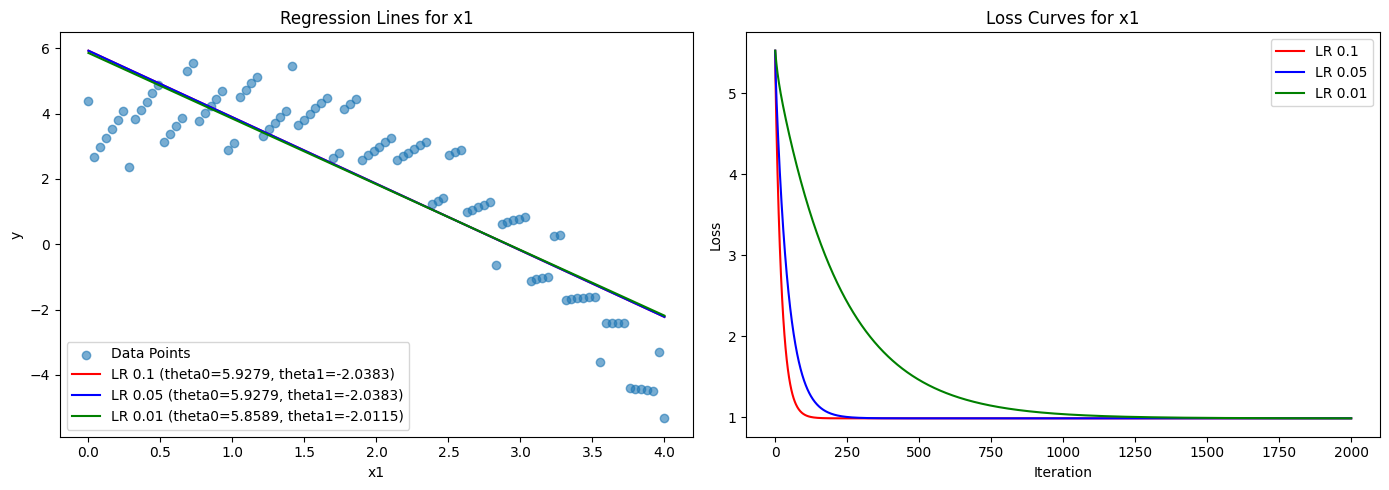

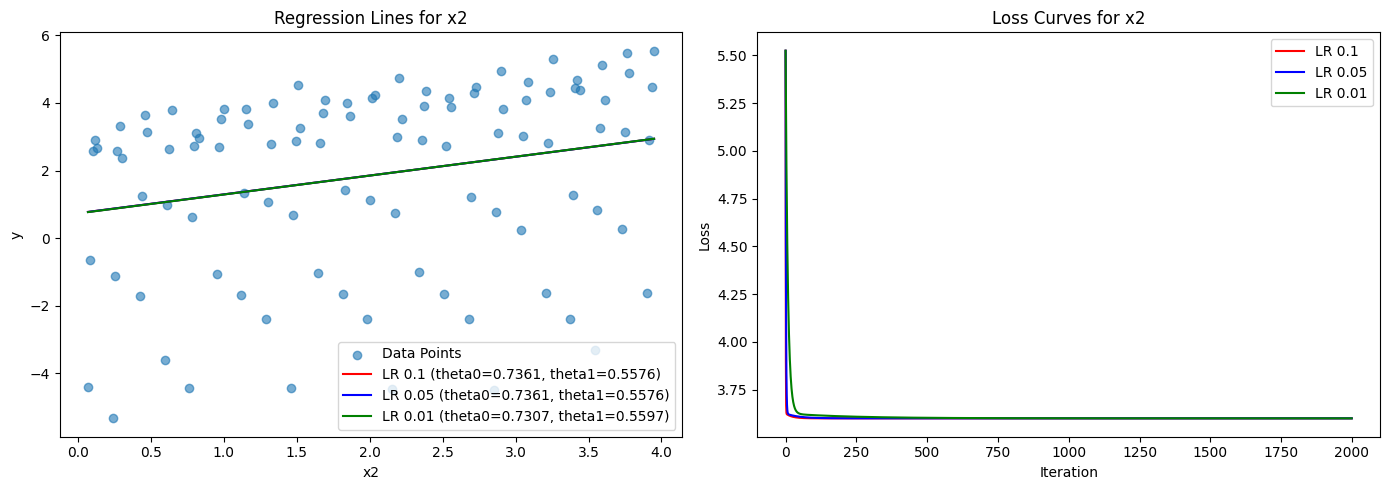

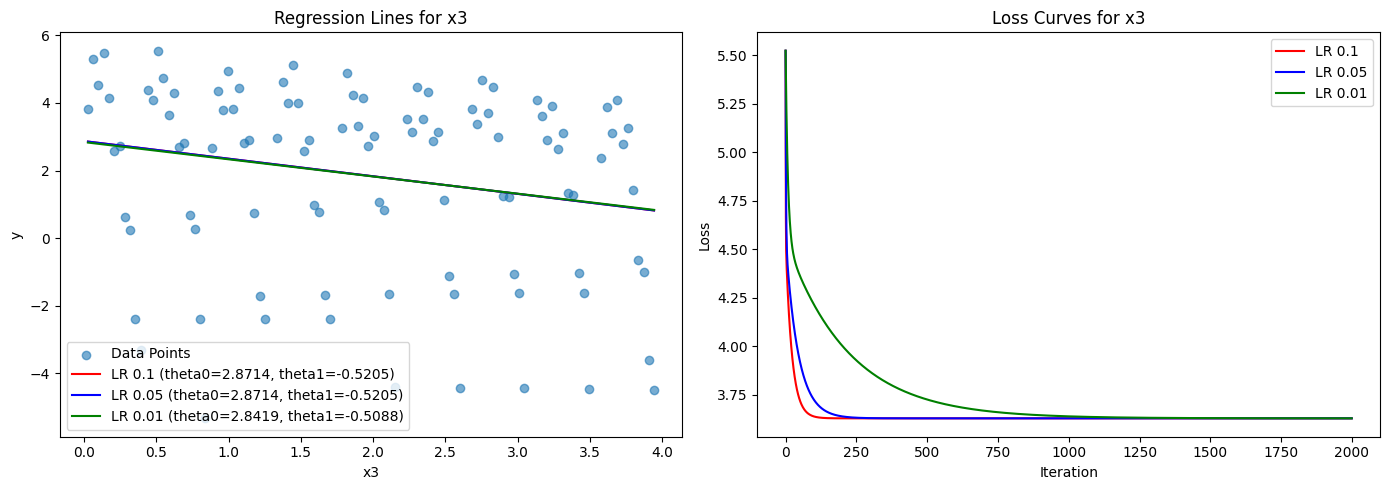

In [5]:
# Define colors for different learning rates
colors = {0.1: 'red', 0.05: 'blue', 0.01: 'green'}

# Loop through each variable to create plots
for var_name, x in zip(['x1', 'x2', 'x3'], [x1, x2, x3]):
  plt.figure(figsize=(14, 5))

  # Subplot 1: Scatter plot and regression lines
  plt.subplot(1, 2, 1)
  plt.scatter(x, y, label='Data Points', alpha=0.6)
  x_line = np.linspace(min(x), max(x), 100)
  for lr in learning_rates:
    theta = results[var_name][lr]['theta']
    # model is theta[0] + theta[1]*x_line
    plt.plot(x_line, theta[0] + theta[1]*x_line, color=colors[lr], label=f'LR {lr} (theta0={theta[0]:.4f}, theta1={theta[1]:.4f})')
  plt.xlabel(var_name)
  plt.ylabel('y')
  plt.title(f'Regression Lines for {var_name}')
  plt.legend()

  # Subplot 2: Loss curves over iterations
  plt.subplot(1, 2, 2)
  for lr in learning_rates:
    losses = results[var_name][lr]['losses']
    plt.plot(range(num_iterations), losses, color=colors[lr], label=f'LR {lr}')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.title(f'Loss Curves for {var_name}')
  plt.legend()

  plt.tight_layout()
  plt.savefig(f"/content/drive/MyDrive/ecge5105/hw/1/p1_{var_name}_plot.png")
  plt.show()

### Problem 1 Analysis and Conclusions<br>

Problem 1 Analysis:

1) Comparing final losses for each single feature:

   - x1 final loss is around ~0.985 (lowest)
   - x2 final loss is around ~3.599
   - x3 final loss is around ~3.629
   Therefore, x1 is the best single predictor for y (lowest loss).

2) Effect of different learning rates:

   - For x1, both 0.1 and 0.05 yield nearly identical final losses and converge quickly, while 0.01 converges more slowly but still reaches a similar final loss.
   - For x2 and x3, all three learning rates converge to roughly the same final loss, but 0.1 and 0.05 generally converge faster than 0.01.


Conclusion for Problem 1:

 - x1 is the best explanatory variable in isolation (lowest loss ~0.985).
 - Larger learning rates (0.1, 0.05) help faster convergence here without instability.
 - A smaller learning rate (0.01) converges more slowly but can still reach a similar final loss.

## Problem 2: Multi-Feature Linear Regression

For Problem 2, we run linear regression using all three features: x1, x2, x3.<br>
I again compare learning rates [0.1, 0.05, 0.01], initialize theta to zero,
observe the loss curves, and pick the best model based on the final loss.<br>
I also compute R² (as an "accuracy") and track the evolution of each theta parameter.

Define Gradient Descent for Multi-Feature Regression

In [22]:
def gradient_descent_multi(X, y, learning_rate=0.1, num_iterations=1000):
  """
  Performs gradient descent for multi-feature linear regression.

  Parameters:
    X -- numpy array of input features (shape: [m, n])
    y -- numpy array of target values (shape: [m,])
    learning_rate -- learning rate for gradient descent
    num_iterations -- number of iterations

  Returns:
    theta -- final learned parameters of shape [n+1,] (theta0, theta1, theta2, theta3)
    losses -- list of loss values over iterations
    r2_scores -- list of R² values over iterations
    theta_history -- list of theta vectors at each iteration
  """
  m = len(y)
  X_new = np.column_stack((np.ones(m), X))
  n = X_new.shape[1]
  theta = np.zeros(n)
  theta = np.zeros(n)  # Initialize parameters to zeros
  losses = []
  r2_scores = []
  theta_history = []

  for i in range(num_iterations):
    y_pred = X_new.dot(theta)
    error = y_pred - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    losses.append(cost)

    # Calculate R² points
    ss_tot = np.sum((y - np.mean(y))**2)
    ss_res = np.sum((y - y_pred)**2)
    r2 = 1 - (ss_res / ss_tot)
    r2_scores.append(r2)

    gradient = (1 / m) * X_new.T.dot(error)
    theta -= learning_rate * gradient

    theta_history.append(theta.copy())


  return theta, losses, r2_scores, theta_history

Run Multi-Feature Experiments for Different Learning Rates

In [29]:
# Combine all three explanatory variables into a feature matrix X
X = np.column_stack((x1, x2, x3))

# Dictionary to store multi-feature regression results for each learning rate
multi_results = {}

# num_iterations = 300
# num_iterations = 1000
num_iterations = 3000
# num_iterations = 3500

# Iterate over the learning rates
for lr in learning_rates:
  theta_multi, losses_multi, r2_scores_multi, theta_history_multi = gradient_descent_multi(X, y, learning_rate=lr, num_iterations=num_iterations)
  multi_results[lr] = {
    'theta': theta_multi,
    'losses': losses_multi,
    'r2_scores': r2_scores_multi,
    'theta_history': theta_history_multi
  }
  print(f"Learning Rate {lr}: theta = {theta_multi}, final loss = {losses_multi[-1]:.6f}")

Learning Rate 0.1: theta = [ 5.31416717 -2.00371927  0.53256334 -0.26560187], final loss = 0.738464
Learning Rate 0.05: theta = [ 5.31416557 -2.00371904  0.5325636  -0.26560163], final loss = 0.738464
Learning Rate 0.01: theta = [ 5.05362928 -1.96691398  0.57561561 -0.22741231], final loss = 0.742087


Plot Loss Curves for Multi-Feature Regression

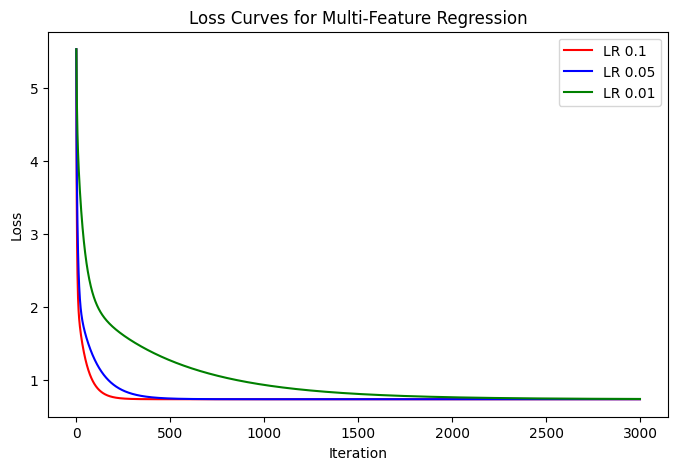

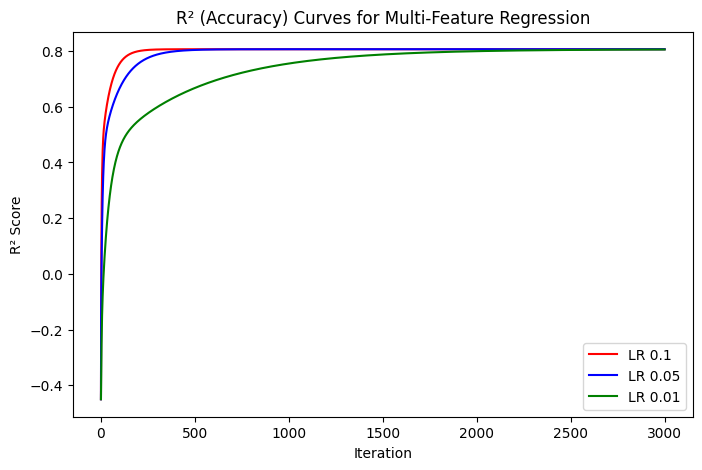

In [30]:
# Plotting Loss curve
plt.figure(figsize=(8, 5))
for lr in learning_rates:
    losses = multi_results[lr]['losses']
    plt.plot(range(num_iterations), losses, color=colors[lr], label=f'LR {lr}')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curves for Multi-Feature Regression')
plt.legend()
plt.savefig(f"/content/drive/MyDrive/ecge5105/hw/1/p2_Loss_Curves_plot.png")
plt.show()

# Plotting R² curve
plt.figure(figsize=(8, 5))
for lr in learning_rates:
    r2_scores = multi_results[lr]['r2_scores']
    plt.plot(range(num_iterations), r2_scores, color=colors[lr], label=f'LR {lr}')
plt.xlabel('Iteration')
plt.ylabel('R² Score')
plt.title('R² (Accuracy) Curves for Multi-Feature Regression')
plt.legend()
plt.savefig(f"/content/drive/MyDrive/ecge5105/hw/1/p2_R2_Curves_plot.png")
plt.show()

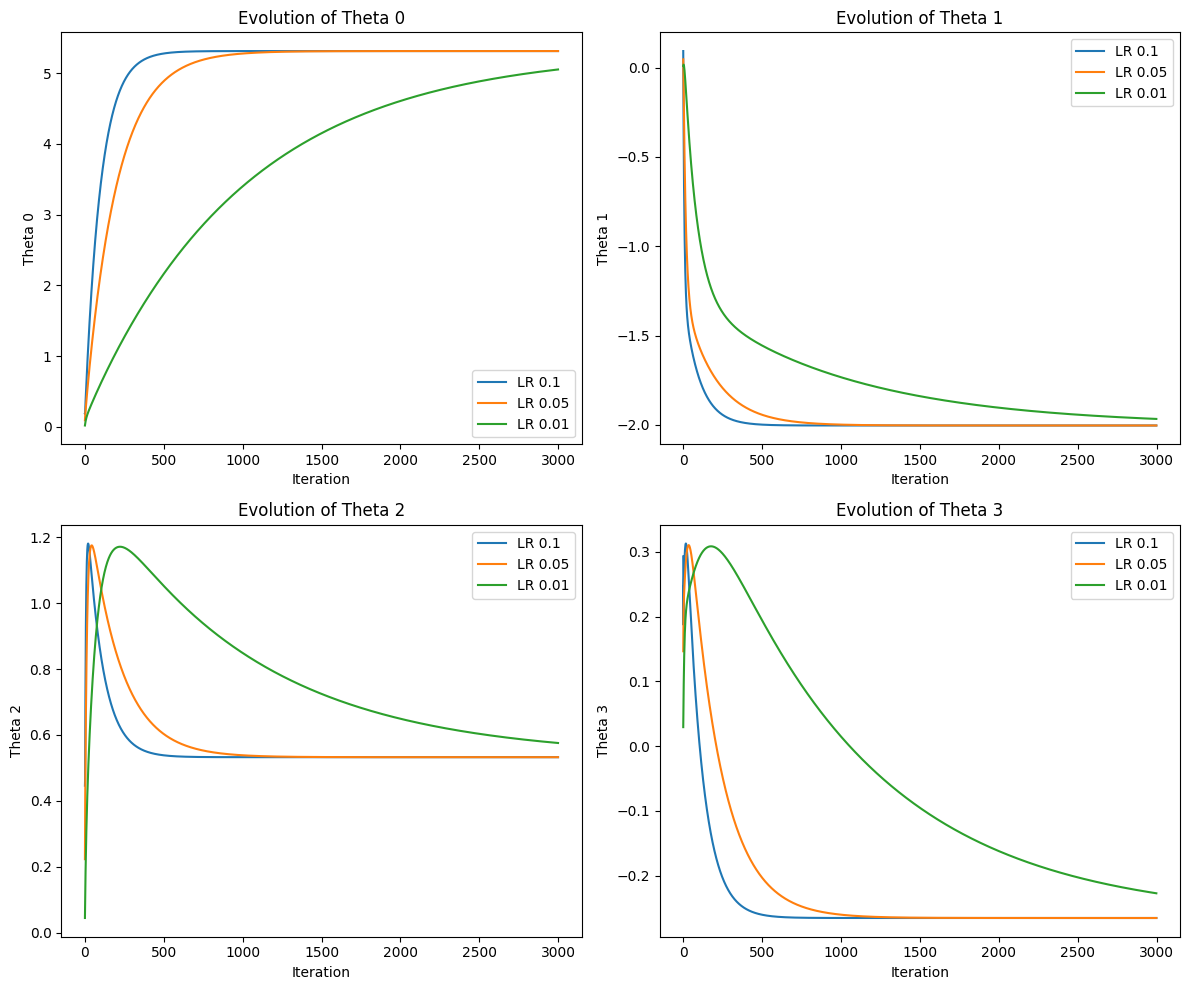

In [31]:
plt.figure(figsize=(12, 10))
# theta0, theta1, theta2, theta3
for i in range(4):
  plt.subplot(2, 2, i+1)
  for lr in learning_rates:
    theta_history = np.array(multi_results[lr]['theta_history'])  # shape: (num_iterations, 4)
    plt.plot(range(num_iterations), theta_history[:, i], label=f'LR {lr}')
  plt.xlabel("Iteration")
  plt.ylabel(f'Theta {i}')
  plt.title(f'Evolution of Theta {i}')
  plt.legend()
plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/ecge5105/hw/1/p2_Theta_Evolution.png")
plt.show()

Prediction with the Best Multi-Feature Model<br>

In [32]:
# Determine the best learning rate based on the lowest final loss
best_lr = min(learning_rates, key=lambda lr: multi_results[lr]['losses'][-1])
best_theta = multi_results[best_lr]['theta']
print(f"Best learning rate for multi-feature regression: {best_lr}")
print(f"Final model coefficients: theta0 = {best_theta[0]:.4f}, theta1 = {best_theta[1]:.4f}, theta2 = {best_theta[2]:.4f}, theta3 = {best_theta[3]:.4f}")

# New input data for prediction: (1,1,1), (2,0,4), (3,2,1)
new_data = np.array([
    [1, 1, 1],
    [2, 0, 4],
    [3, 2, 1]
])

new_data_with_intercept = np.column_stack((np.ones(new_data.shape[0]), new_data))
predictions = np.dot(new_data_with_intercept, best_theta)
for i, pred in enumerate(predictions):
  print(f"Input {new_data[i]}: predicted y = {pred:.4f}")

Best learning rate for multi-feature regression: 0.1
Final model coefficients: theta0 = 5.3142, theta1 = -2.0037, theta2 = 0.5326, theta3 = -0.2656
Input [1 1 1]: predicted y = 3.5774
Input [2 0 4]: predicted y = 0.2443
Input [3 2 1]: predicted y = 0.1025


### Problem 2 Analysis and Conclusions<br>

Problem 2 Analysis:

1) Final Loss Comparison:
   - Learning Rate 0.1 => final loss ~0.738464
   - Learning Rate 0.05 => final loss ~0.738464
   - Learning Rate 0.01 => final loss ~0.742087
   The best final loss is ~0.738464 (for LR=0.1 or LR=0.05).

2) Model Coefficients:

   For the best learning rate (chosen as 0.1), the final parameters are:
     theta0 ~ 5.3142
     theta1 ~ -2.0037
     theta2 ~  0.5326
     theta3 ~ -0.2656

3) Effect of Learning Rate:

   - LR=0.1 or 0.05 converges faster and reaches the lowest final loss quickly.
   - LR=0.01 converges more slowly and ends with a slightly higher loss (~0.7421).

4) R² and Theta Evolution:

   - R² curves show that the model can explain ~80% of the variance in y once converged.
   - Theta evolution plots show each parameter stabilizes after sufficient iterations, with higher learning rates converging in fewer steps.

5) Predictions on new data:

   - For (1,1,1): y_pred ~ 3.5774
   - For (2,0,4): y_pred ~ 0.2443
   - For (3,2,1): y_pred ~ 0.1025


Conclusion for Problem 2:

 - Including all three features yields a lower loss (~0.738) than any single feature alone.
 - A learning rate of 0.1 or 0.05 is optimal, balancing speed of convergence and stability.
 - The final model effectively predicts new inputs, confirming the benefit of multi-feature regression.